In [61]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy

In [62]:
ad = np.load("data/AD_EEG_sub_001_processed.npy")
control = np.load("data/Control_EEG_sub_037_processed.npy")

In [63]:
control.shape

(3, 150000)

Let's split the dataset according to the channels: Fp1, Fp2, and Fp3.

In [64]:
ad_channel_1 = ad[0, :]
control_channel_1 = control[0, :]
ad_channel_2 = ad[1, :]
control_channel_2 = control[1, :]
ad_channel_3 = ad[2, :]
control_channel_3 = control[2, :]

In [65]:
fs = 500 # Sampling rate (Hz)
nperseg = 1024 # test spacing frequency between bins

I decided to choose a nperseg of 1024 because it offers a frequency resolution of 500 / 1024 = 0.49. I demed it the most suitable choice for nperseg considering the tradeoff of other values like 512, 2048, or even 4096, and given that the entire EEG recording is 5 minutes long.

In [66]:
fp1_control, fp1_psd_control = scipy.signal.welch(control_channel_1, fs=fs, nperseg=nperseg)
fp1_ad, fp1_psd_ad = scipy.signal.welch(ad_channel_1, fs=fs, nperseg=nperseg)

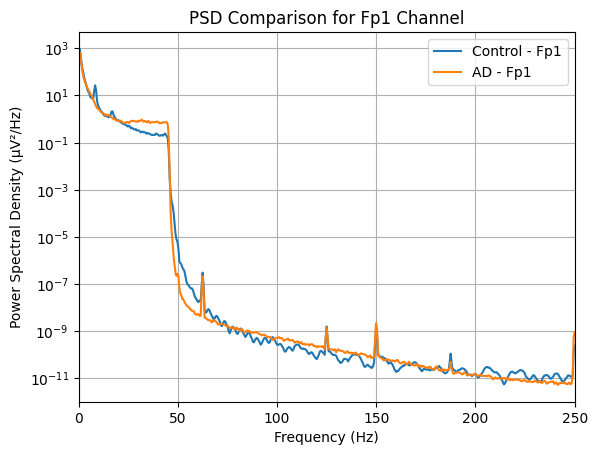

In [67]:
plt.semilogy(fp1_control, fp1_psd_control, label='Control - Fp1')
plt.semilogy(fp1_ad, fp1_psd_ad, label='AD - Fp1')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp1 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
fp2_control, fp2_psd_control = scipy.signal.welch(control_channel_2, fs=fs, nperseg=nperseg)
fp2_ad, fp2_psd_ad = scipy.signal.welch(ad_channel_2, fs=fs, nperseg=nperseg)

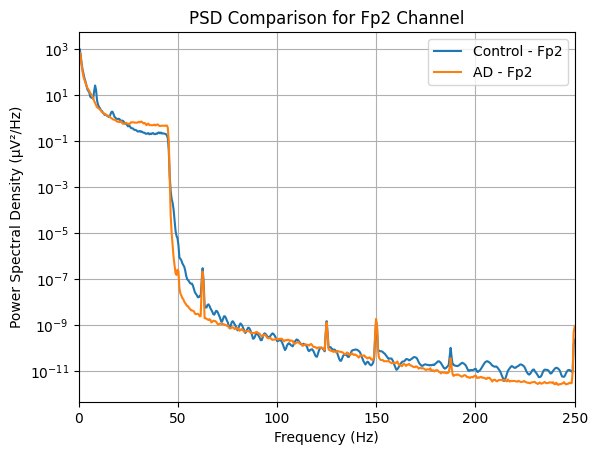

In [69]:
plt.semilogy(fp2_control, fp2_psd_control, label='Control - Fp2')
plt.semilogy(fp2_ad, fp2_psd_ad, label='AD - Fp2')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
fp3_control, fp3_psd_control = scipy.signal.welch(control_channel_3, fs=fs, nperseg=nperseg)
fp3_ad, fp3_psd_ad = scipy.signal.welch(ad_channel_3, fs=fs, nperseg=nperseg)

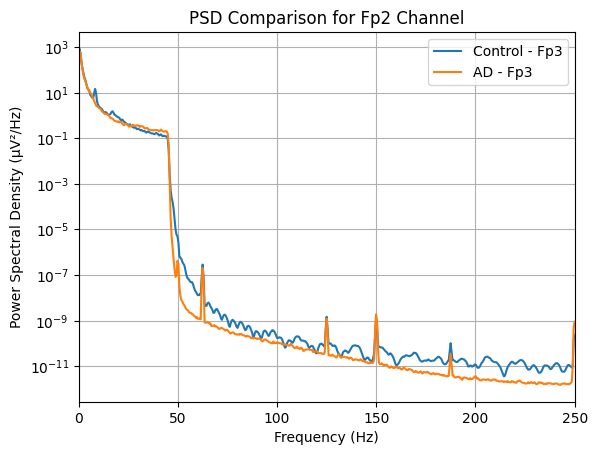

In [71]:
plt.semilogy(fp3_control, fp3_psd_control, label='Control - Fp3')
plt.semilogy(fp3_ad, fp3_psd_ad, label='AD - Fp3')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

Viewing these power spectrums doesn't reveal anything outright. The only noticeable difference between the two subjects is that the Alzheimer's disease individual has a much more stable power spectrum and less variability than the healthy individual. This variability might not necessarily be due to Alzheimer's disease, but due to simple individual differences. Perhaps creating a bandpass filter that allows us to view specific frequencies might highlight specific differences between Alzheimer's and Control patients.

In [72]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = scipy.signal.butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = scipy.signal.sosfilt(sos, data)
    return y
def plot_filter_response(lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = scipy.signal.sosfreqz(sos, worN=2000)
    plt.figure(figsize=(8, 4))
    plt.plot(0.5 * fs * w / np.pi, abs(h), 'b')
    plt.title(f'Bandpass Filter Frequency Response: {lowcut}-{highcut} Hz')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.show()

According to studies, Alzheimer's patients show a lower power in the alpha band when compared to normal patients. 
https://pubmed.ncbi.nlm.nih.gov/21744210/

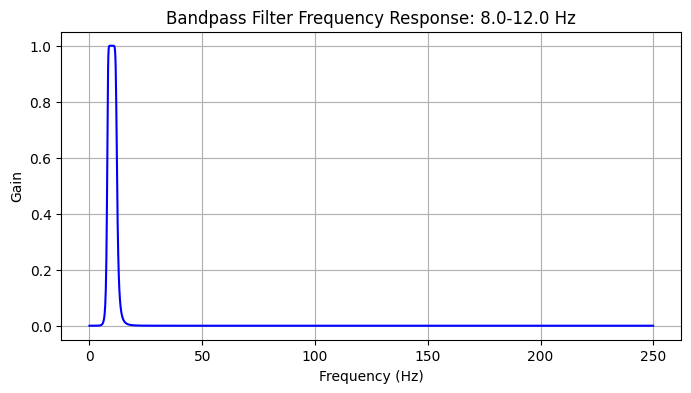

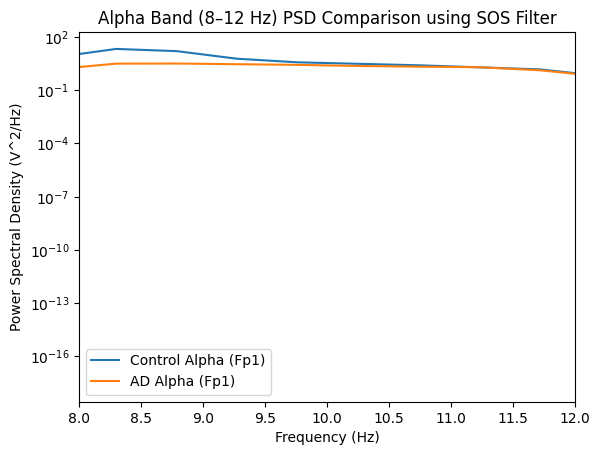

In [73]:
lowcut_alpha = 8.0
highcut_alpha = 12.0
order = 5
plot_filter_response(lowcut_alpha, highcut_alpha, fs, order)
ad_alpha_1 = butter_bandpass_filter(ad_channel_1, lowcut_alpha, highcut_alpha, fs, order)
control_alpha_1 = butter_bandpass_filter(control_channel_1, lowcut_alpha, highcut_alpha, fs, order)
fp1_ad_alpha, fp1_psd_ad_alpha = scipy.signal.welch(ad_alpha_1, fs = fs, nperseg = nperseg)
fp1_control_alpha, fp1_psd_control_alpha = scipy.signal.welch(control_alpha_1, fs = fs, nperseg = nperseg)
plt.semilogy(fp1_control_alpha, fp1_psd_control_alpha, label='Control Alpha (Fp1)')
plt.semilogy(fp1_ad_alpha, fp1_psd_ad_alpha, label='AD Alpha (Fp1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Alpha Band (8–12 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([8, 12])
plt.show()

Let's see if this is the same case in other channels.

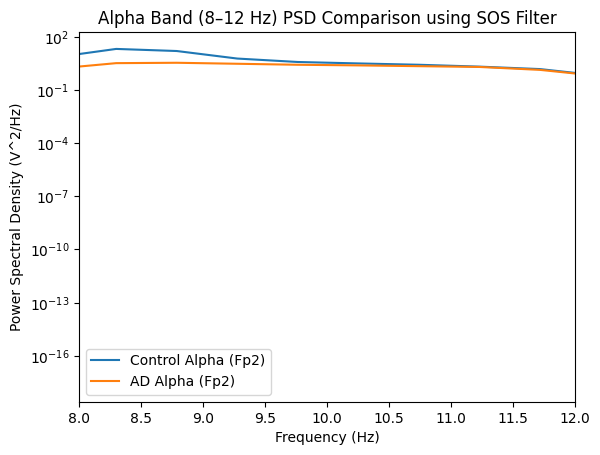

In [74]:
ad_alpha_2 = butter_bandpass_filter(ad_channel_2, lowcut_alpha, highcut_alpha, fs, order)
control_alpha_2 = butter_bandpass_filter(control_channel_2, lowcut_alpha, highcut_alpha, fs, order)
fp2_ad_alpha, fp2_psd_ad_alpha = scipy.signal.welch(ad_alpha_2, fs = fs, nperseg = nperseg)
fp2_control_alpha, fp2_psd_control_alpha = scipy.signal.welch(control_alpha_2, fs = fs, nperseg = nperseg)
plt.semilogy(fp2_control_alpha, fp2_psd_control_alpha, label='Control Alpha (Fp2)')
plt.semilogy(fp2_ad_alpha, fp2_psd_ad_alpha, label='AD Alpha (Fp2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Alpha Band (8–12 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([8, 12])
plt.show()

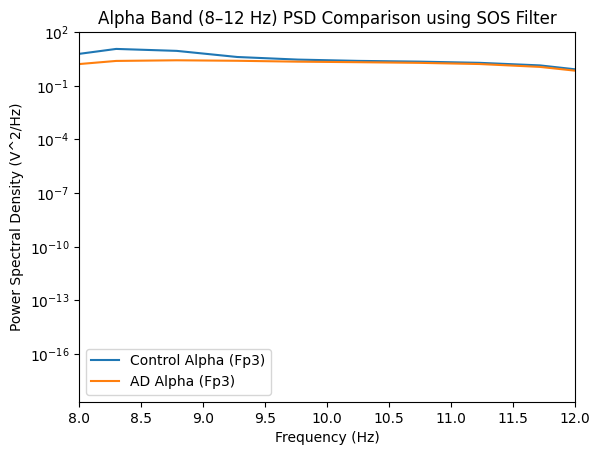

In [75]:
ad_alpha_3 = butter_bandpass_filter(ad_channel_3, lowcut_alpha, highcut_alpha, fs, order)
control_alpha_3 = butter_bandpass_filter(control_channel_3, lowcut_alpha, highcut_alpha, fs, order)
fp3_ad_alpha, fp3_psd_ad_alpha = scipy.signal.welch(ad_alpha_3, fs = fs, nperseg = nperseg)
fp3_control_alpha, fp3_psd_control_alpha = scipy.signal.welch(control_alpha_3, fs = fs, nperseg = nperseg)
plt.semilogy(fp3_control_alpha, fp3_psd_control_alpha, label='Control Alpha (Fp3)')
plt.semilogy(fp3_ad_alpha, fp3_psd_ad_alpha, label='AD Alpha (Fp3)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Alpha Band (8–12 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([8, 12])
plt.show()

Specifically for these two individuals in the dataset, subject_001 with Alzheimer's disease has lower power in the alpha band than subject_027, the healthy control. However, the difference in power slightly varies across channels. Below are the values:

In [76]:
alpha_mask_fp1 = (fp1_ad_alpha >= lowcut_alpha) & (fp1_ad_alpha <= highcut_alpha)
fp1_diff_array = fp1_psd_control_alpha[alpha_mask_fp1] - fp1_psd_ad_alpha[alpha_mask_fp1] 
fp1_mean_diff = np.mean(fp1_diff_array)
print("Fp1 mean diff:", fp1_mean_diff)
alpha_mask_fp2 = (fp2_ad_alpha >= lowcut_alpha) & (fp2_ad_alpha <= highcut_alpha)
fp2_diff_array = fp2_psd_control_alpha[alpha_mask_fp2] - fp2_psd_ad_alpha[alpha_mask_fp2] 
fp2_mean_diff = np.mean(fp2_diff_array)
print("Fp2 mean diff:", fp2_mean_diff)
alpha_mask_fp3 = (fp3_ad_alpha >= lowcut_alpha) & (fp3_ad_alpha <= highcut_alpha)
fp3_diff_array = fp3_psd_control_alpha[alpha_mask_fp3] - fp3_psd_ad_alpha[alpha_mask_fp3] 
fp3_mean_diff = np.mean(fp3_diff_array)
print("Fp3 mean diff:", fp3_mean_diff)

Fp1 mean diff: 4.63656210726049
Fp2 mean diff: 4.297552296868953
Fp3 mean diff: 2.4049728174841456


The average difference in power in the alpha band for channels 1 (Fp1) and 2 (Fp2) between Alzheimer's and normal patients are extremely similar, and only channel 3's (Fp3) average deviates from the other two. This might be due to the different position of the channel 3 electrode when compared to the first 2.

In addition to exhibiting lower power in the alpha band when compared to healthy patients, according to studies, individuals with Alzheimer's disease also show an increase in power in the theta band.
https://pubmed.ncbi.nlm.nih.gov/21744210/

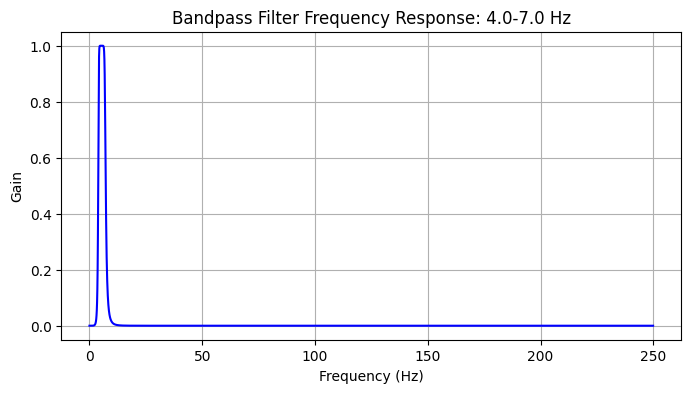

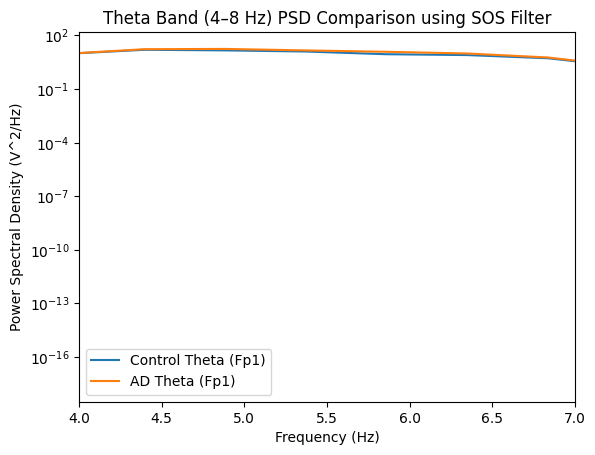

In [77]:
lowcut_theta = 4.0
highcut_theta = 7.0
plot_filter_response(lowcut_theta, highcut_theta, fs, order)
ad_theta_1 = butter_bandpass_filter(ad_channel_1, lowcut_theta, highcut_theta, fs, order)
control_theta_1 = butter_bandpass_filter(control_channel_1, lowcut_theta, highcut_theta, fs, order)
fp1_ad_theta, fp1_psd_ad_theta = scipy.signal.welch(ad_theta_1, fs=fs, nperseg=nperseg)
fp1_control_theta, fp1_psd_control_theta = scipy.signal.welch(control_theta_1, fs=fs, nperseg=nperseg)
plt.semilogy(fp1_control_theta, fp1_psd_control_theta, label='Control Theta (Fp1)')
plt.semilogy(fp1_ad_theta, fp1_psd_ad_theta, label='AD Theta (Fp1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Theta Band (4–8 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([4, 7])
plt.show()

Visually, there doesn't seem to be much of a difference in power between the two subjects. Does this hold true in the other two channels? 

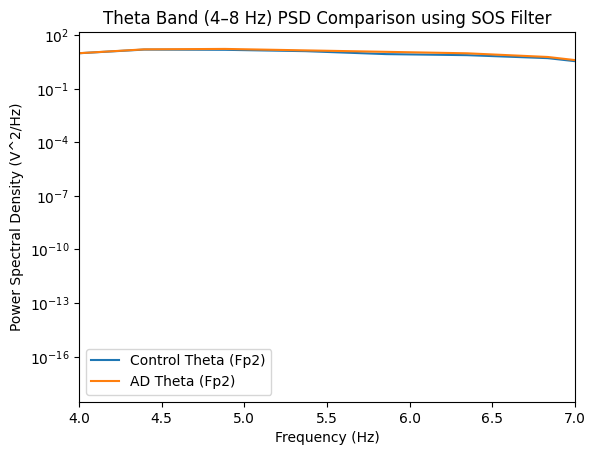

In [78]:
ad_theta_2 = butter_bandpass_filter(ad_channel_2, lowcut_theta, highcut_theta, fs, order)
control_theta_2 = butter_bandpass_filter(control_channel_2, lowcut_theta, highcut_theta, fs, order)
fp2_ad_theta, fp2_psd_ad_theta = scipy.signal.welch(ad_theta_2, fs=fs, nperseg=nperseg)
fp2_control_theta, fp2_psd_control_theta = scipy.signal.welch(control_theta_2, fs=fs, nperseg=nperseg)
plt.semilogy(fp2_control_theta, fp2_psd_control_theta, label='Control Theta (Fp2)')
plt.semilogy(fp2_ad_theta, fp2_psd_ad_theta, label='AD Theta (Fp2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Theta Band (4–8 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([4, 7])
plt.show()

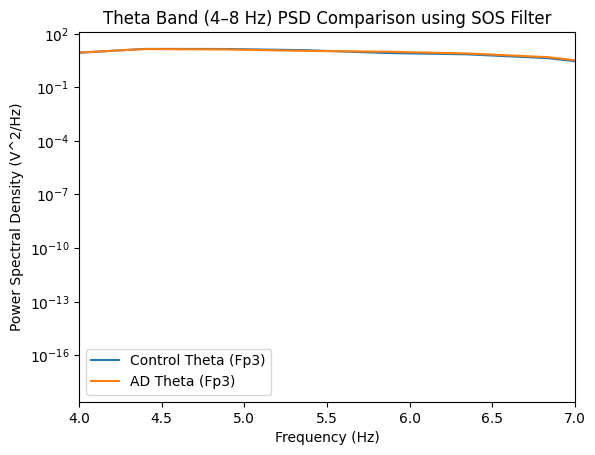

In [79]:
ad_theta_3 = butter_bandpass_filter(ad_channel_3, lowcut_theta, highcut_theta, fs, order)
control_theta_3 = butter_bandpass_filter(control_channel_3, lowcut_theta, highcut_theta, fs, order)
fp3_ad_theta, fp3_psd_ad_theta = scipy.signal.welch(ad_theta_3, fs=fs, nperseg=nperseg)
fp3_control_theta, fp3_psd_control_theta = scipy.signal.welch(control_theta_3, fs=fs, nperseg=nperseg)
plt.semilogy(fp3_control_theta, fp3_psd_control_theta, label='Control Theta (Fp3)')
plt.semilogy(fp3_ad_theta, fp3_psd_ad_theta, label='AD Theta (Fp3)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Theta Band (4–8 Hz) PSD Comparison using SOS Filter')
plt.legend()
plt.xlim([4, 7])
plt.show()

Across all three channels, visually it appears that the power in the theta band is the same for both Alzheimer's disease patients and heathly control patients. Could there be a mathematical difference?

In [80]:
theta_mask_fp1 = (fp1_ad_theta >= lowcut_theta) & (fp1_ad_theta <= highcut_theta)
fp1_diff_array = fp1_psd_control_theta[theta_mask_fp1] - fp1_psd_ad_theta[theta_mask_fp1]
fp1_mean_diff = np.mean(fp1_diff_array)
print("Fp1 mean diff:", fp1_mean_diff)
theta_mask_fp2 = (fp2_ad_theta >= lowcut_theta) & (fp2_ad_theta <= highcut_theta)
fp2_diff_array = fp2_psd_control_theta[theta_mask_fp2] - fp2_psd_ad_theta[theta_mask_fp2]
fp2_mean_diff = np.mean(fp2_diff_array)
print("Fp2 mean diff:", fp2_mean_diff)
theta_mask_fp3 = (fp3_ad_theta >= lowcut_theta) & (fp3_ad_theta <= highcut_theta)
fp3_diff_array = fp3_psd_control_theta[theta_mask_fp3] - fp3_psd_ad_theta[theta_mask_fp3]
fp3_mean_diff = np.mean(fp3_diff_array)
print("Fp3 mean diff:", fp3_mean_diff)

Fp1 mean diff: -1.9284210802711528
Fp2 mean diff: -1.547755966499027
Fp3 mean diff: -0.13924523140844527


The average difference in power between the two subjects in the theta band is quite small - however, it is still in accordance with the previously mentioned literature - that Alzheimer's disease individuals exhibit increased power in the theta band when compared to healthy individuals. In the same fashion as the alpha band, the mean difference in channel 3 (Fp3) is smaller than in both the other channels.

Conclusion:
When viewing this dataset with two subjects - subject_001 with Alzheimer’s disease and subject_027, a healthy control - it becomes apparent that the differences in EEG power between these individuals are subtle and vary across channels. Specifically, subject_001 exhibits lower power in the alpha band compared to subject_027. This aligns with previous research highlighting that Alzheimer's patients tend to have lower power in the alpha band when compared to healthy patients. Notably, the average alpha power difference for channels Fp1 and Fp2 is very similar between the two groups, while the difference in Fp3 deviates noticeably, likely due to the different positioning of the Fp3 electrode relative to Fp1 and Fp2. 

In the theta band, the average difference in power between the two subjects is quite small; however, this observation still aligns with previous literature suggesting that individuals with Alzheimer’s disease tend to exhibit increased theta power compared to healthy individuals.

These observations are based on a very limited dataset involving only two subjects. This analysis represents an exploratory application of signal processing techniques, specifically bandpass filtering and power spectral density estimation using Welch’s method and does not necessarily prove any definitive clinical differences. Maybe further research with a larger sample size can conclude more definitive comparisons between Alzheimer's patients and healthy patients using these same signal processing techniques.